In [1]:
!pip install pyAudioAnalysis
!pip install pydub
!pip install eyed3
!pip install hmmlearn
from google.colab import output
output.clear()

In [2]:
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from pyAudioAnalysis import MidTermFeatures as aFm
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis.ShortTermFeatures import feature_extraction as aF
import moviepy.editor as mp
from pydub import AudioSegment
import os
import cv2
import pyAudioAnalysis.audioSegmentation as aS
from scipy.io.wavfile import read
import pandas as pd
from moviepy.editor import *
from moviepy.audio.AudioClip import AudioArrayClip

# What is sound?

Sound is a temporal signal produced by ***variation of air pressure***. It has ***a variable intensity*** and can be represented with the ***frequencies*** that are contained in it.
Let's load a sound file and plot its representation in the time domain.


In [3]:
ball_bounce=Audio('ping.wav')
ball_bounce

This sound is a tennis table ball bounce on table. Let's see how the signal is displayed in the ***time domain***.

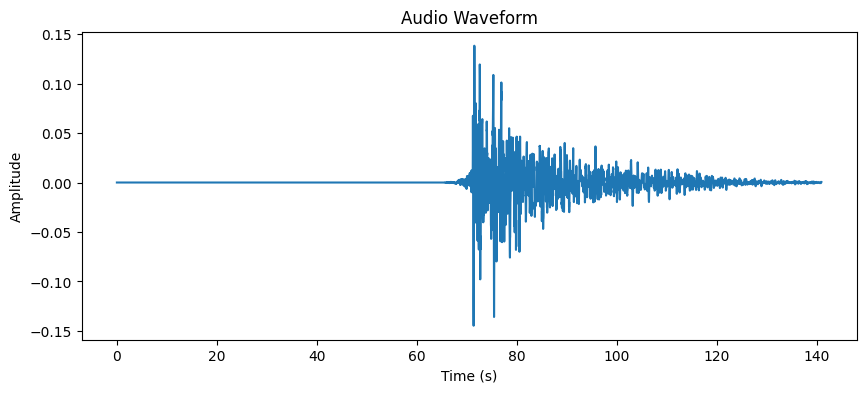

In [4]:
# Load the audio file
audio_path = 'ping.wav'
audio, sr = librosa.load(audio_path)

# Get the time axis in seconds
duration = len(audio) / sr
time = librosa.times_like(audio, sr=sr)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

As we can see, the signal is too complex and we can't extract from this waveform an intuitive information that would help us extract this sound and differentiate it from others.

Let's use ***Fast Fourier Transformation*** to visualize the frequencies present in our signal.

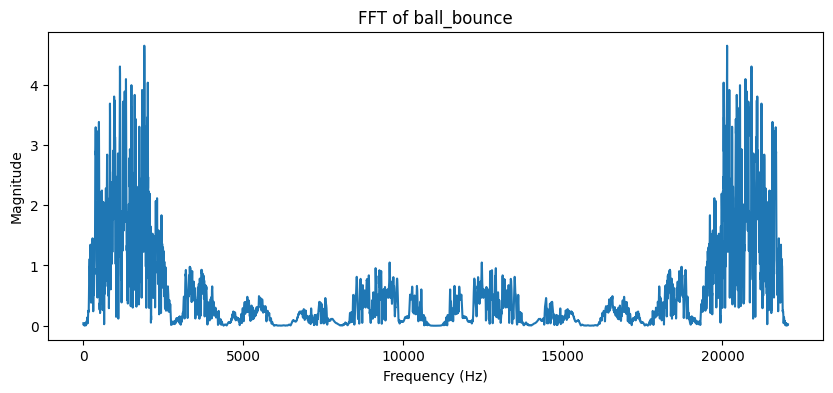

In [5]:
fft = np.fft.fft(audio)

# Compute the magnitude spectrum
magnitude = np.abs(fft)

# Create the frequency axis
freq = np.linspace(0, sr, len(magnitude))

# Plot the FFT
plt.figure(figsize=(10, 4))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of ball_bounce')
plt.show()


We can see that the ball bounce is not a simple dirac or one peak. It's a signal that has a duration in time. We remark that this signal has multiple frequencies. Let's display the relevant frequencies

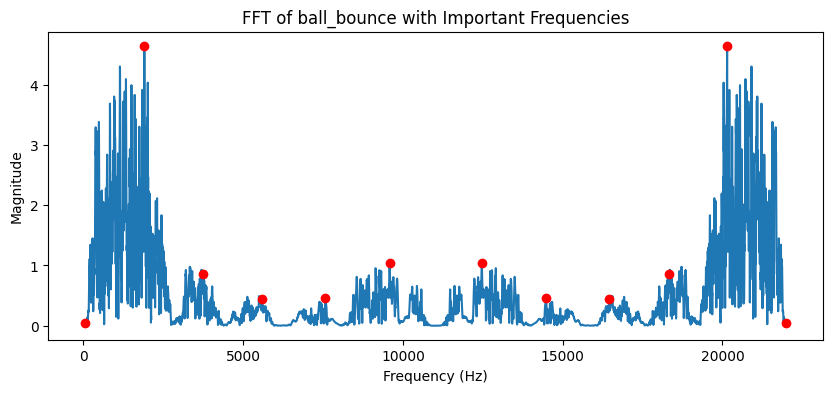

In [6]:
# Create the frequency axis
freq = np.linspace(0, sr, len(magnitude))

# Find peaks in the magnitude spectrum
peaks, _ = find_peaks(magnitude, distance=500)  # Adjust the distance parameter as needed

# Select the corresponding frequencies
important_freq = freq[peaks]

# Plot the FFT with peaks
plt.figure(figsize=(10, 4))
plt.plot(freq, magnitude)
plt.plot(important_freq, magnitude[peaks], 'ro')  # Highlight the important frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of ball_bounce with Important Frequencies')
plt.show()

In [7]:
# important frequencies
important_freq

array([   61.74435843,  1906.81106902,  3740.98171636,  5596.9444902 ,
        7572.76395981,  9584.90364026, 12468.72838083, 14480.86806127,
       16456.68753088, 18312.65030473, 20146.82095207, 21991.88766266])

A signal may produce different sounds over time. So its spectrum varies over time. One way of representing uniquely a signal is to plot its ***spectrogram***.

***A Spectrogram*** of a signal plots its ***Spectrum*** over time and is like ***a photograph*** of the signal. It plots Time on the x-axis and Frequency on the y-axis. It is as though we took the Spectrum again and again at different instances in time, and then joined them all together into a single plot.

Let's plot the spectrogram of our ball bounce sound and analyze its aspects.

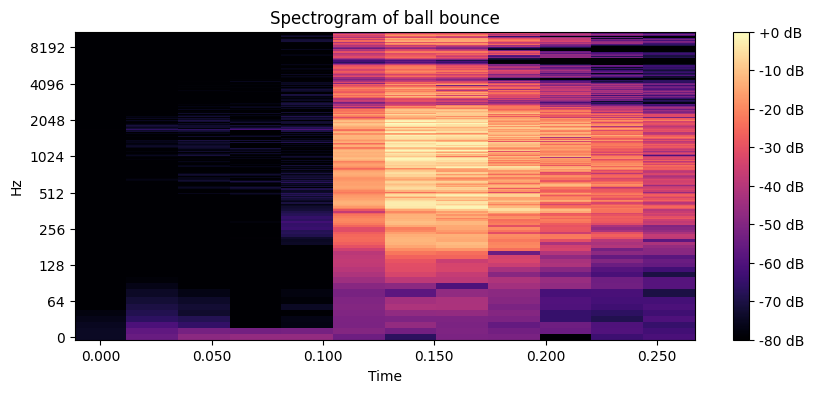

In [8]:
# Compute the spectrogram (use short time fourier transformation)
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of ball bounce')
plt.show()

As we can see in the figure above, the spectrogram is so representative of the complexity of the signal evolution over time.
The frequencies that are more present in the signal appear in a bright color and inversely.

Let's examine another signal which is the start signal in swimming competitions.

In [10]:
start_signal=Audio('start_signal.wav')
start_signal

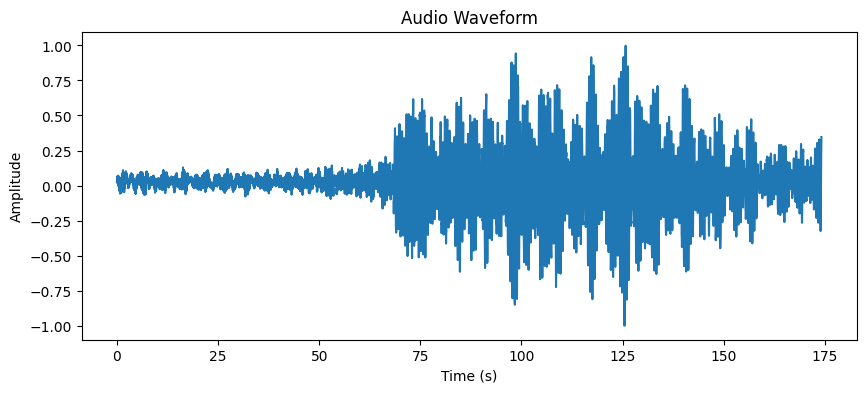

In [11]:
# Load the audio file
audio_path = 'start_signal.wav'
audio, sr = librosa.load(audio_path)

# Get the time axis in seconds
duration = len(audio) / sr
time = librosa.times_like(audio, sr=sr)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

This plot shows the audio form of the start signal in the time domain.

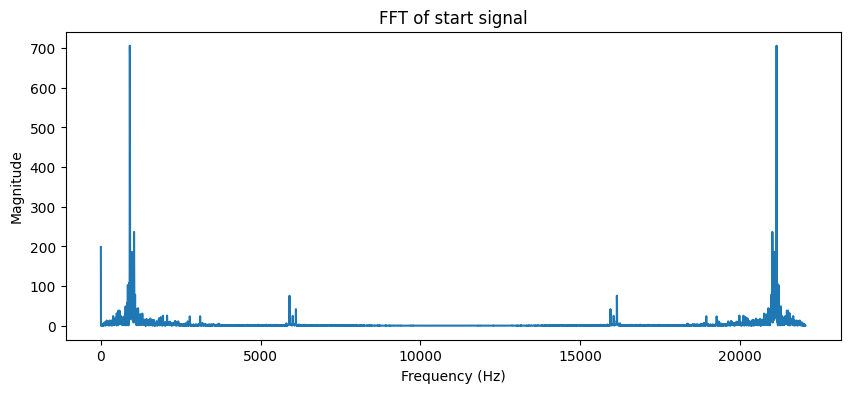

In [12]:
fft = np.fft.fft(audio)

# Compute the magnitude spectrum
magnitude = np.abs(fft)

# Create the frequency axis
freq = np.linspace(0, sr, len(magnitude))

# Plot the FFT
plt.figure(figsize=(10, 4))
plt.plot(freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of start signal')
plt.show()


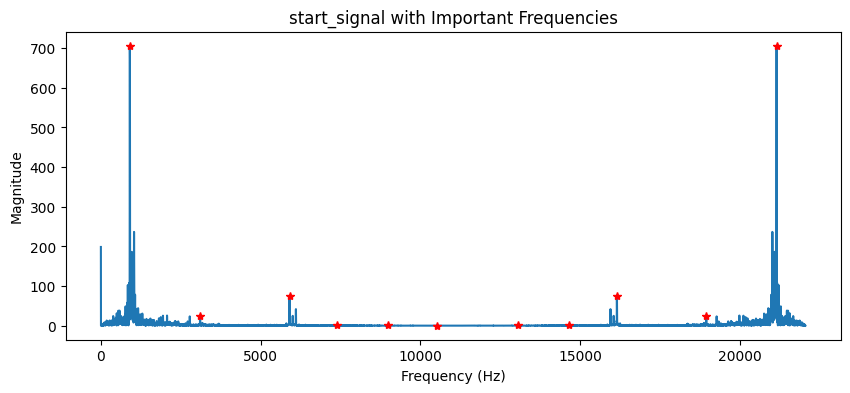

In [17]:
# Create the frequency axis
freq = np.linspace(0, sr, len(magnitude))

# Find peaks in the magnitude spectrum
peaks, _ = find_peaks(magnitude, distance=500)  # Adjust the distance parameter as needed

# Select the corresponding frequencies
important_freq = freq[peaks]

# Plot the FFT with peaks
plt.figure(figsize=(10, 4))
plt.plot(freq, magnitude)
plt.plot(important_freq, magnitude[peaks], 'r*')  # Highlight the important frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('start_signal with Important Frequencies')
plt.show()

In [14]:
# important frequencies
important_freq

array([  905.6407521 ,  3105.0540072 ,  5904.30724097,  7389.20522736,
        8991.71889585, 10508.96119483, 13061.2214962 , 14663.73516469,
       16148.63315109, 18947.88638485, 21147.29963995])

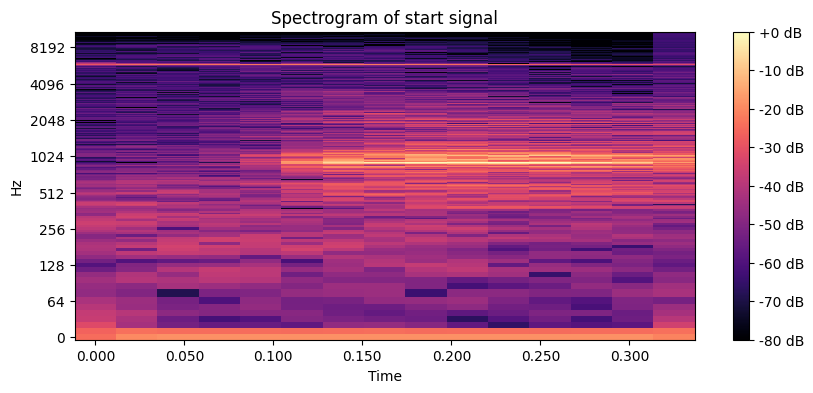

In [18]:
# Compute the spectrogram (use short time fourier transformation)
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of start signal')
plt.show()

As we can see in the figure above, we can see that low frequencies (close to 0) are mostly present in the signal through time. Frequencies around  1024 Hz are also heavily present.

Now that we presented sound and the ways we can represent it, we will lay down some simple methods that we can use to process a sound.

# Sound filtering

In [38]:
from scipy.signal import butter,filtfilt# Filter requirements
import plotly.graph_objects as go
from scipy.io import wavfile
# Filter requirements.
T = 2        # Sample Period
fs = 1000       # sample rate, Hz
cutoff = 20     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hznyq = 0.5 * fs  # Nyquist Frequencyorder = 2       # sin wave can be approx represented as quadratic
nyq = 0.5 * fs  # Nyquist Frequency
order = 5       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
sig,sample_rate=librosa.load("tv-glitch.mp3")
duration = len(sig) / sample_rate
time = librosa.times_like(sig, sr=sample_rate)
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(sig, cutoff, sample_rate, order)
wavfile.write("filtered_tv_glitch.wav", sample_rate,y)

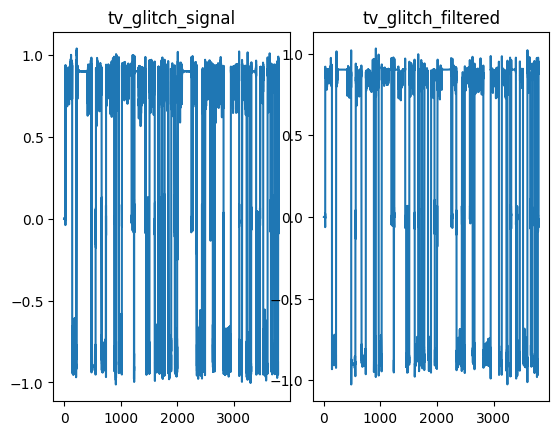

In [39]:
figure, axes = plt.subplots(1,2)
# Plot the first image
axes[0].plot(time,sig)
axes[0].set_title("tv_glitch_signal")
# Plot the second image
axes[1].plot(time,y)
axes[1].set_title("tv_glitch_filtered")
# Adjust spacing between the images
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()

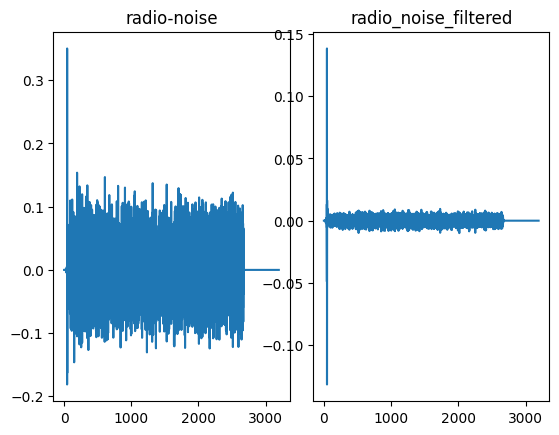

In [40]:
sig,sample_rate=librosa.load("radio-static.mp3")
duration = len(sig) / sample_rate
time = librosa.times_like(sig, sr=sample_rate)
y = butter_lowpass_filter(sig, cutoff, sample_rate, order)
wavfile.write("filtered_radio_static.wav", sample_rate,y)
figure, axes = plt.subplots(1,2)
# Plot the first image
axes[0].plot(time,sig)
axes[0].set_title("radio-noise")
# Plot the second image
axes[1].plot(time,y)
axes[1].set_title("radio_noise_filtered")
# Adjust spacing between the images
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()

# Time stretching

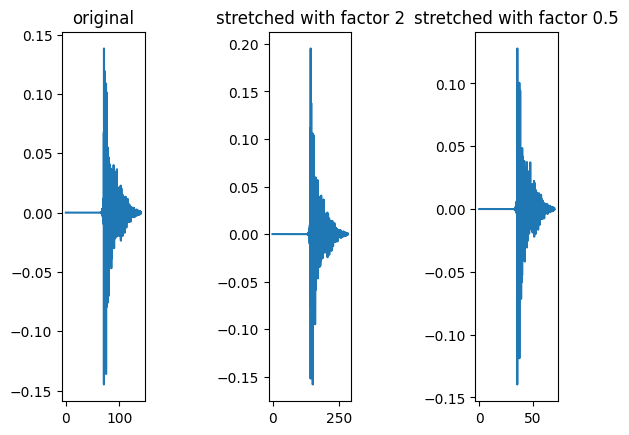

In [63]:
import wave
def stretch( audioname,  factor ):
 infile=wave.open( audioname, 'rb')
 rate= infile.getframerate()
 channels=infile.getnchannels()
 swidth=infile.getsampwidth()
 nframes= infile.getnframes()
 audio_signal= infile.readframes(nframes)
 outfile = wave.open('stretched.wav', 'wb')
 outfile.setnchannels(channels)
 outfile.setsampwidth(swidth)
 outfile.setframerate(int(rate/factor))
 outfile.writeframes(audio_signal)
 outfile.close()
figure, axes = plt.subplots(1,3)
# Plot the original sound
sig,sample_rate=librosa.load("ping.wav")
duration = len(sig) / sample_rate
time = librosa.times_like(sig, sr=sample_rate)
axes[0].plot(time,sig)
axes[0].set_title("original")
# Plot the stretched sound factor>1
factor=2
stretch("ping.wav",factor)
y ,sample_rate= librosa.load("stretched.wav")
time1 = librosa.times_like(y, sr=sample_rate)
axes[1].plot(time1,y)
axes[1].set_title(f"stretched with factor {factor}")
# Plot the stretched sound factor<1
factor=0.5
stretch("ping.wav",factor)
y ,sample_rate= librosa.load("stretched.wav")
time2 = librosa.times_like(y, sr=sample_rate)
axes[2].plot(time2,y)
axes[2].set_title(f"stretched with factor {factor}")
plt.subplots_adjust(wspace=1.5)

# Display the plot
plt.show()

Other processing techniques include  equalization, amplitude modulation, overdrive, pitch shifting, reverb, delay, compression, and more.

Useful links :
  

*   https://www.pathpartnertech.com/audio-signal-processing-understanding-digital-analog-audio-signal-processing/

*   https://docs.cycling74.com/max7/vignettes/sound_processing_techniques_topic


